# Description du problème

**Etude de la demande de vélos**

**datetime** - hourly date + timestamp  <br>
**season** -  1 = spring, 2 = summer, 3 = fall, 4 = winter  <br>
**holiday** - whether the day is considered a holiday <br>
**workingday** - whether the day is neither a weekend nor holiday <br>
**weather** <br > 
- 1: Clear, Few clouds, Partly cloudy, Partly cloudy <br>
- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist <br>
- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds <br>
- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog <br>

**temp** - temperature in Celsius <br>
**atemp** - "feels like" temperature in Celsius <br>
**humidity** - relative humidity <br>
**windspeed** - wind speed <br>
**casual** - number of non-registered user rentals initiated <br>
**registered** - number of registered user rentals initiated <br>
**count** - number of total rentals <br>

Tout d'abord, importons nos données et les modules dont nous avons besoin <br> 
* numpy, qui sert de librairie fondamentale pour le calcul scientifique.
* pandas, qui permet le traitement de jeux de données sous différents formats, notamment csv.
* matplotlib et seaborn, pour créer différents graphiques.
* scipy qui va nous permettre de mener l'analyse statistique plus simplement.
* scikit-learn pour la partie Machine Learning.

In [2]:
import numpy as np
import pandas as pd
import sklearn
from sklearn import decomposition
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn import neighbors
from sklearn import ensemble
from datetime import datetime, timedelta

In [3]:
df_original = pd.read_csv('bike.csv')
df_original

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [4]:
df_original.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [5]:
df = df_original.copy(deep=True)

# Analyse des données

Objectifs :
* Observer les données de plus près
* Analyser les dépendances entre les variables
* Traiter le jeu de données

## Visualisation et premier traitement des données

In [6]:
df.datetime = df.apply(lambda row : datetime.strptime(str(row.datetime), '%Y-%m-%d %H:%M:%S'),axis=1)

In [7]:
df.drop(columns=['casual','registered'],inplace=True)
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,1
...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,129


In [8]:
df.loc[df['season'] ==1, 'season'] = 'hiver'
df.loc[df['season'] ==2, 'season'] = 'printemps'
df.loc[df['season'] ==3, 'season'] = 'été'
df.loc[df['season'] ==4, 'season'] = 'automne'

In [9]:
df.loc[df['weather'] ==1, 'weather'] = 'clair'
df.loc[df['weather'] ==2, 'weather'] = 'gris'
df.loc[df['weather'] ==3, 'weather'] = 'faible pluie'
df.loc[df['weather'] ==4, 'weather'] = 'pluie'

In [10]:
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count
0,2011-01-01 00:00:00,hiver,0,0,clair,9.84,14.395,81,0.0000,16
1,2011-01-01 01:00:00,hiver,0,0,clair,9.02,13.635,80,0.0000,40
2,2011-01-01 02:00:00,hiver,0,0,clair,9.02,13.635,80,0.0000,32
3,2011-01-01 03:00:00,hiver,0,0,clair,9.84,14.395,75,0.0000,13
4,2011-01-01 04:00:00,hiver,0,0,clair,9.84,14.395,75,0.0000,1
...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,automne,0,1,clair,15.58,19.695,50,26.0027,336
10882,2012-12-19 20:00:00,automne,0,1,clair,14.76,17.425,57,15.0013,241
10883,2012-12-19 21:00:00,automne,0,1,clair,13.94,15.910,61,15.0013,168
10884,2012-12-19 22:00:00,automne,0,1,clair,13.94,17.425,61,6.0032,129


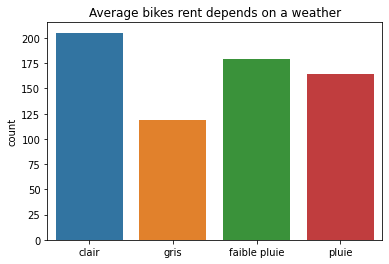

In [11]:
fig = plt.subplots(figsize = (6,4))
plt.title("Average bikes rent depends on a weather")
plt.ylabel('weather')
sns.barplot(x = df['weather'].unique(),y = df['count'].groupby(df['weather']).mean());

## Informations sur le data set

In [12]:
df.isna().sum().sum()

0

In [13]:
df.holiday.value_counts()

0    10575
1      311
Name: holiday, dtype: int64

In [14]:
df.workingday.value_counts()

1    7412
0    3474
Name: workingday, dtype: int64

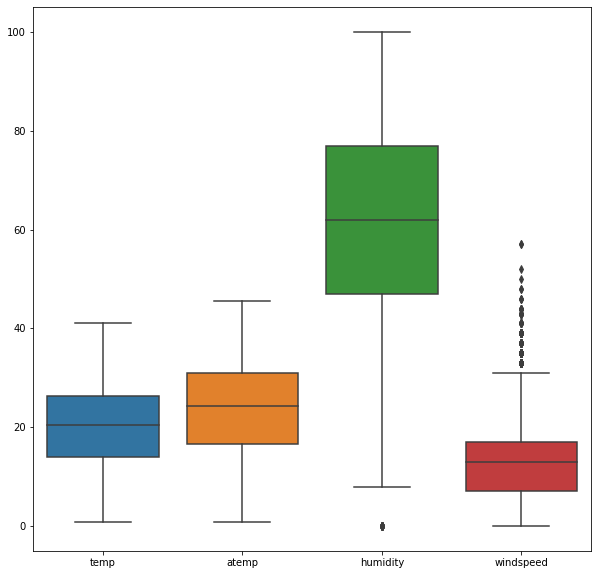

In [15]:
sns.boxplot(data=df[['temp','atemp', 'humidity', 'windspeed']])
fig=plt.gcf()
fig.set_size_inches(10,10)

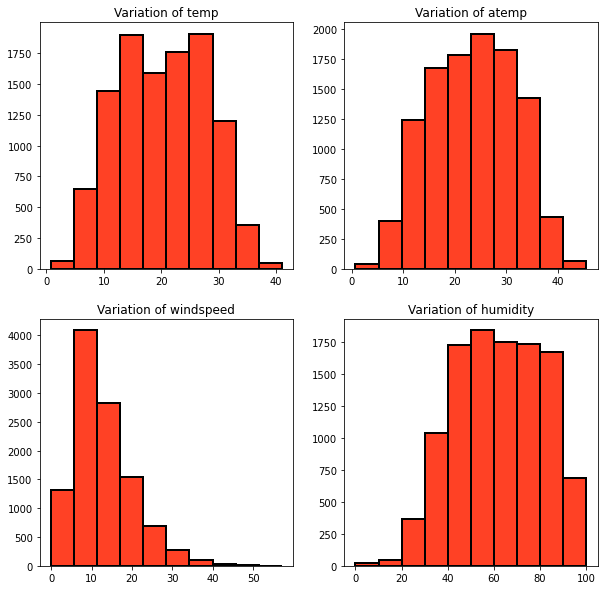

In [16]:
fig,axes=plt.subplots(2,2)

axes[0,0].hist(x="temp",data=df,edgecolor="black",linewidth=2,color='#ff4125')
axes[0,0].set_title("Variation of temp")
axes[0,1].hist(x="atemp",data=df,edgecolor="black",linewidth=2,color='#ff4125')
axes[0,1].set_title("Variation of atemp")
axes[1,0].hist(x="windspeed",data=df,edgecolor="black",linewidth=2,color='#ff4125')
axes[1,0].set_title("Variation of windspeed")
axes[1,1].hist(x="humidity",data=df,edgecolor="black",linewidth=2,color='#ff4125')
axes[1,1].set_title("Variation of humidity")
fig.set_size_inches(10,10)

<AxesSubplot:>

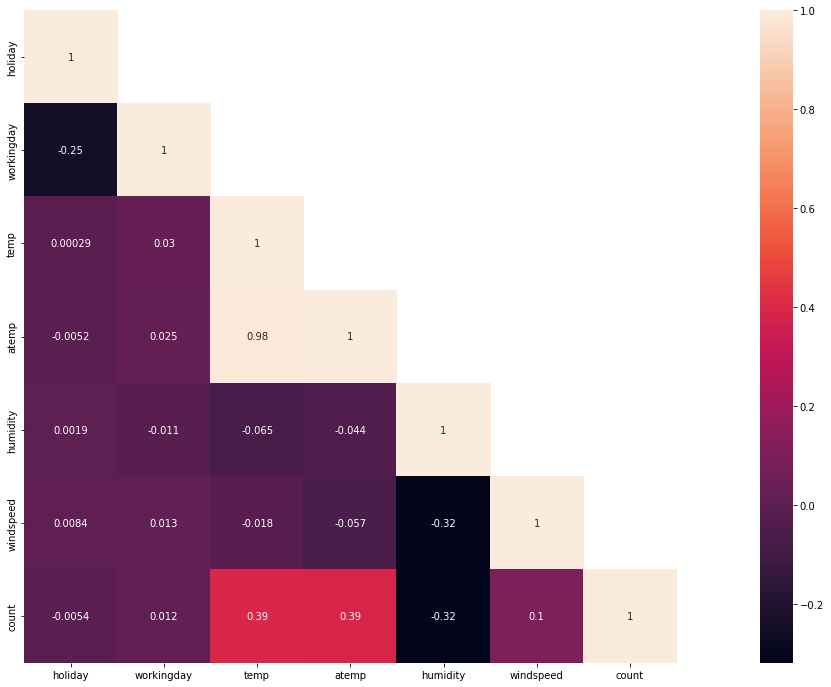

In [17]:
cor_mat= df[:].corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False
fig=plt.gcf()
fig.set_size_inches(30,12)
sns.heatmap(data=cor_mat,mask=mask,square=True,annot=True,cbar=True)

## Heure et période

<AxesSubplot:title={'center':'Bike sharing for a few days'}, xlabel='datetime', ylabel='count'>

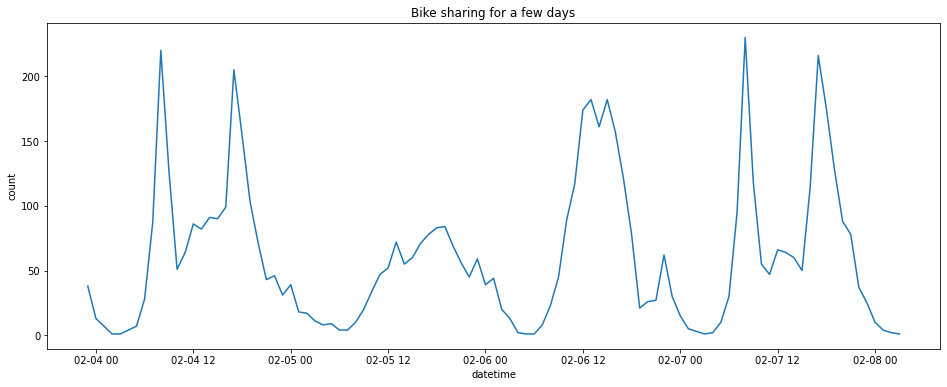

In [18]:
plt.figure(figsize=(16, 6))
plt.title('Bike sharing for a few days')
sns.lineplot(data = df.iloc[500:600], x = 'datetime', y = 'count')

In [19]:
df['hour'] = pd.DatetimeIndex(df['datetime']).hour

df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,hour
0,2011-01-01 00:00:00,hiver,0,0,clair,9.84,14.395,81,0.0000,16,0
1,2011-01-01 01:00:00,hiver,0,0,clair,9.02,13.635,80,0.0000,40,1
2,2011-01-01 02:00:00,hiver,0,0,clair,9.02,13.635,80,0.0000,32,2
3,2011-01-01 03:00:00,hiver,0,0,clair,9.84,14.395,75,0.0000,13,3
4,2011-01-01 04:00:00,hiver,0,0,clair,9.84,14.395,75,0.0000,1,4
...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,automne,0,1,clair,15.58,19.695,50,26.0027,336,19
10882,2012-12-19 20:00:00,automne,0,1,clair,14.76,17.425,57,15.0013,241,20
10883,2012-12-19 21:00:00,automne,0,1,clair,13.94,15.910,61,15.0013,168,21
10884,2012-12-19 22:00:00,automne,0,1,clair,13.94,17.425,61,6.0032,129,22


In [20]:
def plage_horaire(row):
  heure = row.hour
  if heure >= 0 and heure < 6:
    return 'nuit'
  elif heure >= 6 and heure <12:
    return 'matinee'
  elif heure >=12 and heure <18:
    return 'aprem'
  else:
    return 'soiree'

In [21]:
df['periode'] = df.apply(plage_horaire,axis=1)
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,hour,periode
0,2011-01-01 00:00:00,hiver,0,0,clair,9.84,14.395,81,0.0000,16,0,nuit
1,2011-01-01 01:00:00,hiver,0,0,clair,9.02,13.635,80,0.0000,40,1,nuit
2,2011-01-01 02:00:00,hiver,0,0,clair,9.02,13.635,80,0.0000,32,2,nuit
3,2011-01-01 03:00:00,hiver,0,0,clair,9.84,14.395,75,0.0000,13,3,nuit
4,2011-01-01 04:00:00,hiver,0,0,clair,9.84,14.395,75,0.0000,1,4,nuit
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,automne,0,1,clair,15.58,19.695,50,26.0027,336,19,soiree
10882,2012-12-19 20:00:00,automne,0,1,clair,14.76,17.425,57,15.0013,241,20,soiree
10883,2012-12-19 21:00:00,automne,0,1,clair,13.94,15.910,61,15.0013,168,21,soiree
10884,2012-12-19 22:00:00,automne,0,1,clair,13.94,17.425,61,6.0032,129,22,soiree


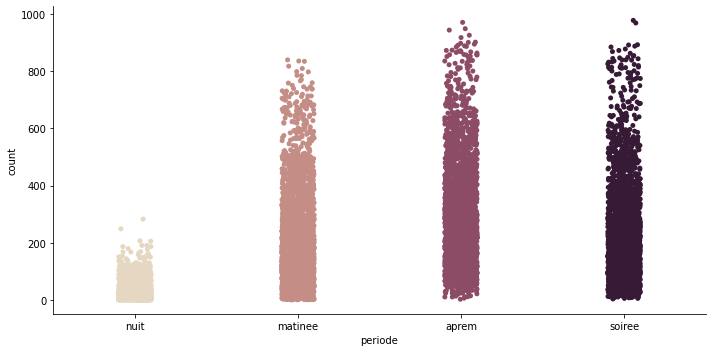

In [22]:
sns.catplot(x="periode",y="count", aspect=2,palette="ch:.25", data=df)

C:\Users\pauli\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 9.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\pauli\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 10.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\pauli\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 64.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


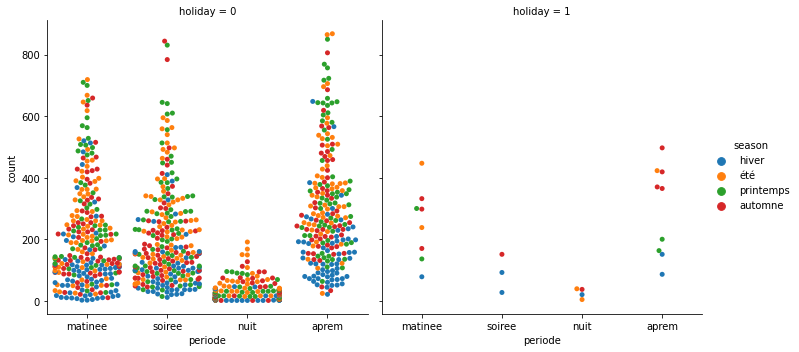

In [23]:
#plt.figure(figsize=(16,6))
sns.catplot(y="count", hue="season",x="periode", kind="swarm", col='holiday', data=df.sample(1000))

In [24]:
df = pd.get_dummies(df,columns=['periode'],prefix='',prefix_sep='')
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,hour,aprem,matinee,nuit,soiree
0,2011-01-01 00:00:00,hiver,0,0,clair,9.84,14.395,81,0.0000,16,0,0,0,1,0
1,2011-01-01 01:00:00,hiver,0,0,clair,9.02,13.635,80,0.0000,40,1,0,0,1,0
2,2011-01-01 02:00:00,hiver,0,0,clair,9.02,13.635,80,0.0000,32,2,0,0,1,0
3,2011-01-01 03:00:00,hiver,0,0,clair,9.84,14.395,75,0.0000,13,3,0,0,1,0
4,2011-01-01 04:00:00,hiver,0,0,clair,9.84,14.395,75,0.0000,1,4,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,automne,0,1,clair,15.58,19.695,50,26.0027,336,19,0,0,0,1
10882,2012-12-19 20:00:00,automne,0,1,clair,14.76,17.425,57,15.0013,241,20,0,0,0,1
10883,2012-12-19 21:00:00,automne,0,1,clair,13.94,15.910,61,15.0013,168,21,0,0,0,1
10884,2012-12-19 22:00:00,automne,0,1,clair,13.94,17.425,61,6.0032,129,22,0,0,0,1


## Saisons

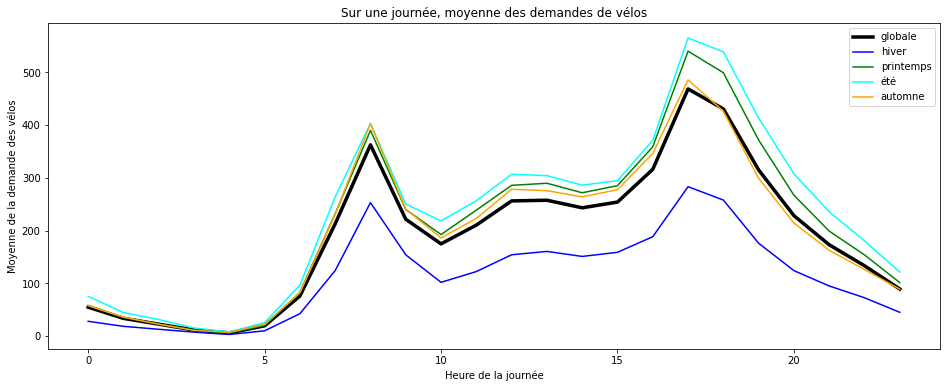

In [25]:
plt.figure(figsize=(16,6))
plt.plot(df.groupby(['hour']).mean()['count'].index , df.groupby(['hour']).mean()['count'],label='globale',linewidth=3.5,color='black')
plt.plot(df.groupby(['hour']).mean()['count'].index , df[df.season=='hiver'].groupby(['hour']).mean()['count'],label='hiver',color='blue')
plt.plot(df.groupby(['hour']).mean()['count'].index , df[df.season=='printemps'].groupby(['hour']).mean()['count'],label='printemps',color='green')
plt.plot(df.groupby(['hour']).mean()['count'].index , df[df.season=='été'].groupby(['hour']).mean()['count'],label='été',color='cyan')
plt.plot(df.groupby(['hour']).mean()['count'].index , df[df.season=='automne'].groupby(['hour']).mean()['count'],label='automne',color='orange')
plt.title('Sur une journée, moyenne des demandes de vélos')
plt.xlabel('Heure de la journée')
plt.ylabel('Moyenne de la demande des vélos')
plt.legend()
plt.show()

In [26]:
df_ = df.copy(deep=True)

In [27]:
df_['day'] = pd.DatetimeIndex(df.datetime).dayofweek
df_['month'] = pd.DatetimeIndex(df.datetime).month
df_['year'] = pd.DatetimeIndex(df.datetime).year
df_['year'] = df_.apply(lambda row : row.year - 2011 , axis = 1)

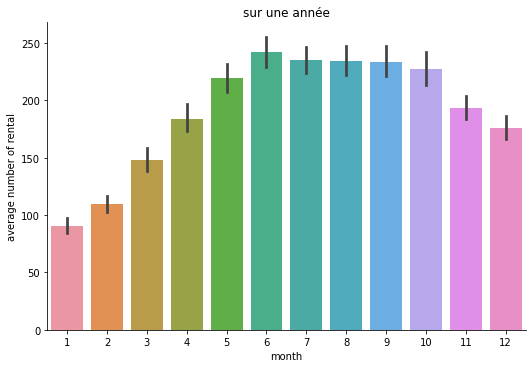

In [28]:
sns.catplot(x='month',y='count', data = df_ , kind='bar',height=5,aspect=1.5).set(title="sur une année", ylabel = 'average number of rental')

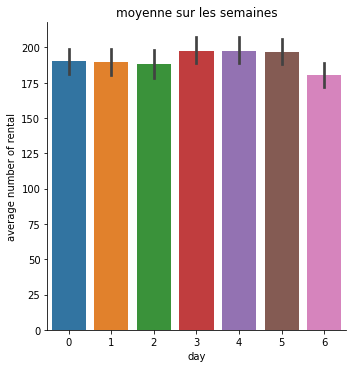

In [29]:
sns.catplot(x='day',y='count',kind='bar',data=df_,height=5,aspect=1).set(title = 'moyenne sur les semaines', ylabel = 'average number of rental')

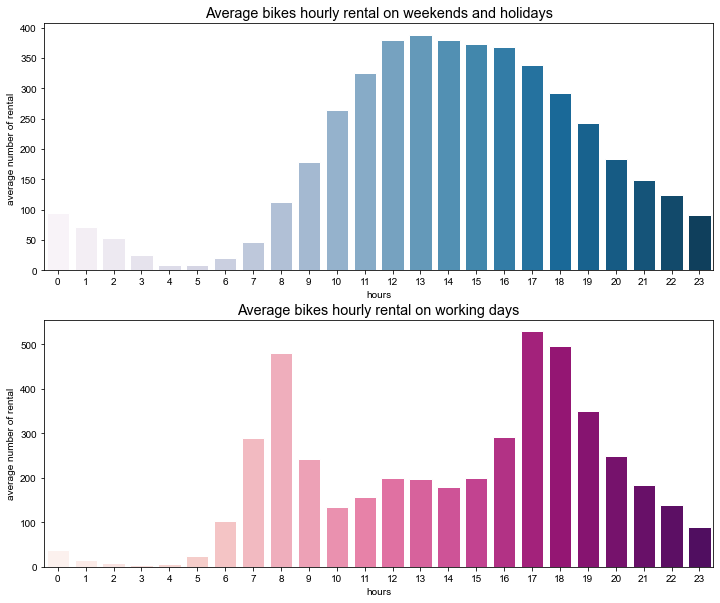

In [30]:
fig, ax = plt.subplots(2,1,figsize =(12,10))
sns.set(font_scale=1.2)

sns.barplot(x = df_['hour'].unique(),y= df_['count'].loc[df_['workingday']==0].groupby(df_['hour']).mean(),
           ax = ax[0], palette= 'PuBu').set(title = 'Average bikes hourly rental on weekends and holidays',
                                            xlabel = 'hours', ylabel = 'average number of rental ')
sns.barplot(x = df_['hour'].unique(),
            y= df_['count'].loc[df_['workingday']==1].groupby(df_['hour']).mean(),
           ax = ax[1], palette='RdPu').set(title='Average bikes hourly rental on working days',
                                          xlabel = 'hours',ylabel = 'average number of rental');

In [31]:
# df.drop(columns=['datetime'],inplace=True)
df.drop(columns=['hour'],inplace=True)

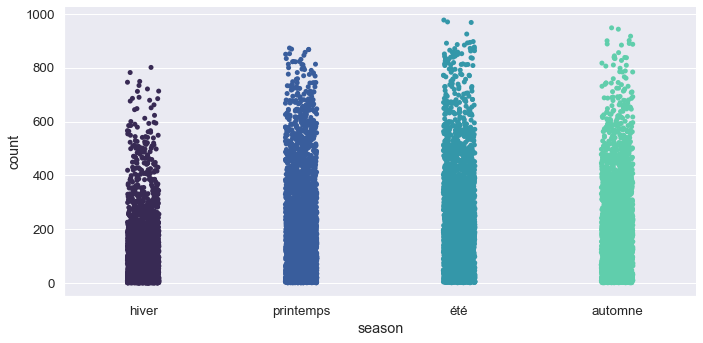

In [32]:
sns.catplot(x="season",y="count", aspect=2,palette="mako", data=df)

In [33]:
df = pd.get_dummies(df,columns=['season'],prefix='',prefix_sep='')
df = pd.get_dummies(df,columns=['weather'],prefix='',prefix_sep='')

In [34]:
df

,datetime,holiday,workingday,temp,atemp,humidity,windspeed,count,aprem,matinee,nuit,soiree,automne,hiver,printemps,été,clair,faible pluie,gris,pluie
0,2011-01-01 00:00:00,0,0,9.84,14.395,81,0.0000,16,0,0,1,0,0,1,0,0,1,0,0,0
1,2011-01-01 01:00:00,0,0,9.02,13.635,80,0.0000,40,0,0,1,0,0,1,0,0,1,0,0,0
2,2011-01-01 02:00:00,0,0,9.02,13.635,80,0.0000,32,0,0,1,0,0,1,0,0,1,0,0,0
3,2011-01-01 03:00:00,0,0,9.84,14.395,75,0.0000,13,0,0,1,0,0,1,0,0,1,0,0,0
4,2011-01-01 04:00:00,0,0,9.84,14.395,75,0.0000,1,0,0,1,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,0,1,15.58,19.695,50,26.0027,336,0,0,0,1,1,0,0,0,1,0,0,0
10882,2012-12-19 20:00:00,0,1,14.76,17.425,57,15.0013,241,0,0,0,1,1,0,0,0,1,0,0,0
10883,2012-12-19 21:00:00,0,1,13.94,15.910,61,15.0013,168,0,0,0,1,1,0,0,0,1,0,0,0
10884,2012-12-19 22:00:00,0,1,13.94,17.425,61,6.0032,129,0,0,0,1,1,0,0,0,1,0,0,0


## Température

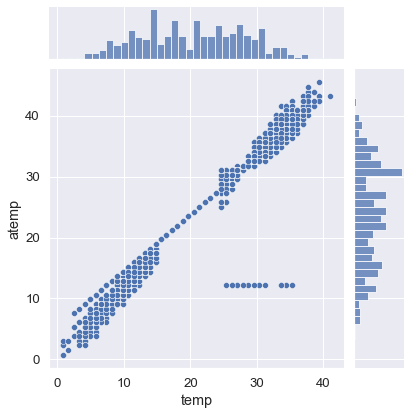

In [35]:
sns.jointplot(x='temp', y='atemp', data=df)


Pour étudier les dépendances statistiques entre les variables, on réalise différentes mesures:

* un test du $χ^{2}$
  entre deux variables qualitatives 
* un test de Kruskal et un diagramme en boîte entre une variable qualitative et une variable quantitative 
* un calcul de coefficients de corrélation entre deux variables quantitatives <br>
Pour être sûr que les modifications n'affectent pas les tests, on reprend généralement le jeu de données originel en enlevant cette fois-ci les lignes possédant des valeurs manquantes.

Calculons ici la corrélation entre ```temp``` et ```atemp```.

In [36]:
from scipy.stats import pearsonr, spearmanr

df_temp_atemp = df.loc[:,['temp','atemp']]
coeff_pearson,_ = pearsonr(df.temp,df.atemp)
coeff_spearmanr = spearmanr(df.temp,df.atemp)

print("Coefficient de Pearson = ",coeff_pearson)
print("Coefficient de Spearman = ",coeff_spearmanr[0])

print("La p-value du test de Spearman vaut:", coeff_spearmanr[1])

Coefficient de Pearson =  0.9849481104817124
Coefficient de Spearman =  0.9871284684480133
La p-value du test de Spearman vaut: 0.0


On peut donc retirer l'une ou l'autre des variables. 

In [37]:
df.drop(columns=['temp'],inplace=True)

In [193]:
df

,datetime,holiday,workingday,atemp,humidity,windspeed,count,aprem,matinee,nuit,soiree,automne,hiver,printemps,été,clair,faible pluie,gris,pluie
0,2011-01-01 00:00:00,0,0,14.395,81,0.0000,16,0,0,1,0,0,1,0,0,1,0,0,0
1,2011-01-01 01:00:00,0,0,13.635,80,0.0000,40,0,0,1,0,0,1,0,0,1,0,0,0
2,2011-01-01 02:00:00,0,0,13.635,80,0.0000,32,0,0,1,0,0,1,0,0,1,0,0,0
3,2011-01-01 03:00:00,0,0,14.395,75,0.0000,13,0,0,1,0,0,1,0,0,1,0,0,0
4,2011-01-01 04:00:00,0,0,14.395,75,0.0000,1,0,0,1,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,0,1,19.695,50,26.0027,336,0,0,0,1,1,0,0,0,1,0,0,0
10882,2012-12-19 20:00:00,0,1,17.425,57,15.0013,241,0,0,0,1,1,0,0,0,1,0,0,0
10883,2012-12-19 21:00:00,0,1,15.910,61,15.0013,168,0,0,0,1,1,0,0,0,1,0,0,0
10884,2012-12-19 22:00:00,0,1,17.425,61,6.0032,129,0,0,0,1,1,0,0,0,1,0,0,0


## Prédiction de la demande

In [38]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [39]:
df = pd.read_csv('bike.csv',index_col=['datetime'])[['count']]
df.index = pd.DatetimeIndex(df.index.values)#,freq=df.index.inferred_freq)
df_part = df.iloc[-400:]
df

,count
2011-01-01 00:00:00,16
2011-01-01 01:00:00,40
2011-01-01 02:00:00,32
2011-01-01 03:00:00,13
2011-01-01 04:00:00,1
...,...
2012-12-19 19:00:00,336
2012-12-19 20:00:00,241
2012-12-19 21:00:00,168
2012-12-19 22:00:00,129


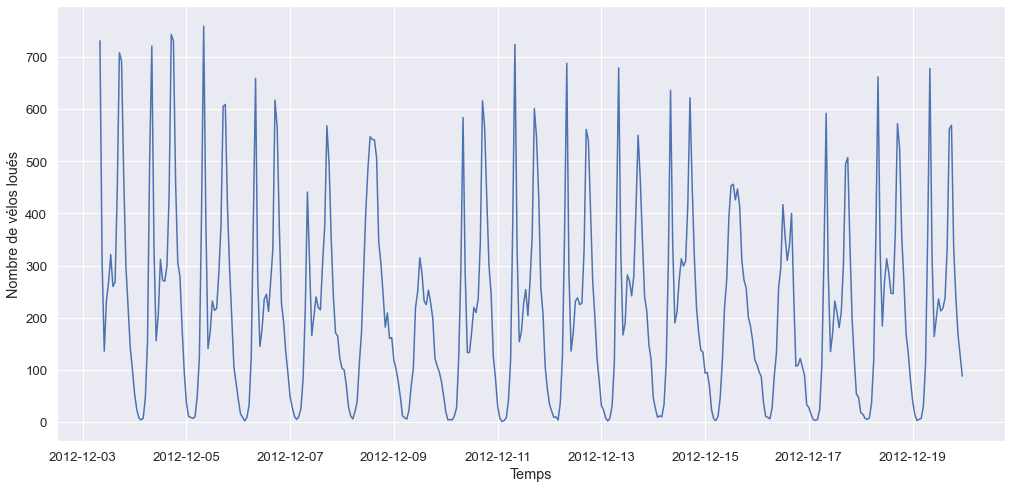

In [196]:
plt.figure(figsize=(17,8))
plt.xlabel('Temps')
plt.ylabel('Nombre de vélos loués')
plt.plot(df_part)
plt.show();

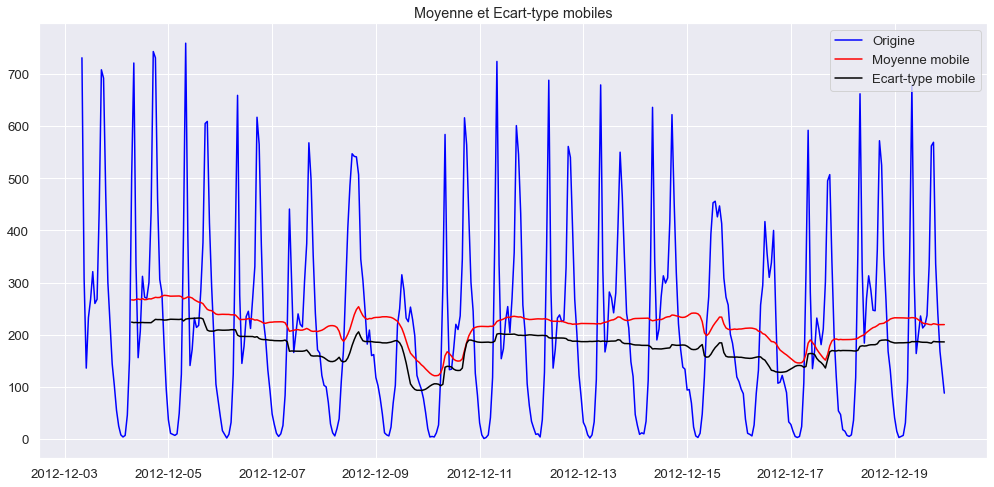

In [197]:
rolling_mean = df_part.rolling(window = 24).mean()
rolling_std = df_part.rolling(window = 24).std()
plt.figure(figsize=(17,8))
plt.plot(df_part, color = 'blue', label = 'Origine')
plt.plot(rolling_mean, color = 'red', label = 'Moyenne mobile')
plt.plot(rolling_std, color = 'black', label = 'Ecart-type mobile')
plt.legend(loc = 'best')
plt.title('Moyenne et Ecart-type mobiles')
plt.show()

In [198]:
def get_stationarity(timeseries,window=12):
    
    # Statistiques mobiles
    rolling_mean = timeseries.rolling(window=window).mean()
    rolling_std = timeseries.rolling(window=window).std()
    
    # tracé statistiques mobiles
    plt.figure(figsize=(17,8))
    original = plt.plot(timeseries, color='blue', label='Origine')
    mean = plt.plot(rolling_mean, color='red', label='Moyenne Mobile')
    std = plt.plot(rolling_std, color='black', label='Ecart-type Mobile')
    plt.legend(loc='best')
    plt.title('Moyenne et écart-type Mobiles')
    plt.show(block=False)
    
    # Test Dickey–Fuller :
    result = adfuller(timeseries['count'])
    print('Statistiques ADF : {}'.format(result[0]))
    print('p-value : {}'.format(result[1]))
    print('Valeurs Critiques :')
    for key, value in result[4].items():
        print('\t{}: {}'.format(key, value))

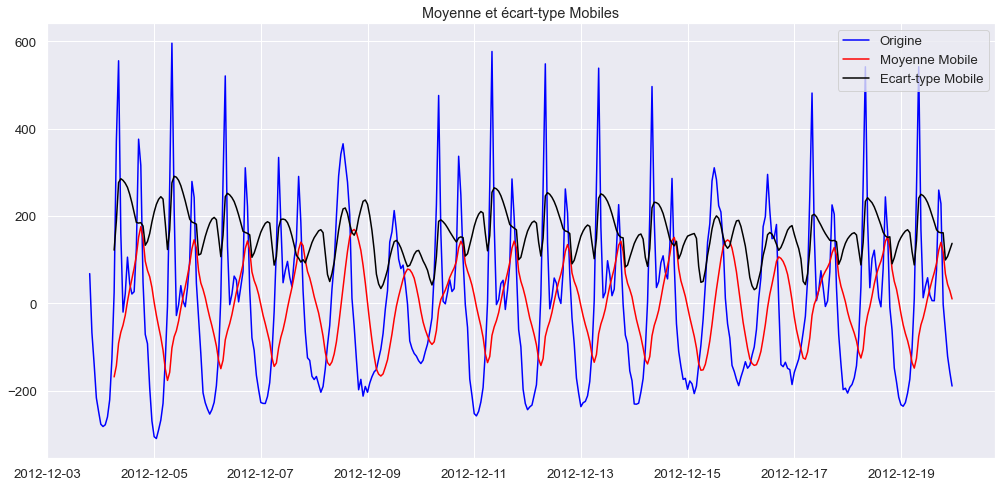

Statistiques ADF : -13.630494649579452
p-value : 1.7270679943355284e-25
Valeurs Critiques :
	1%: -3.4480996560263386
	5%: -2.8693621113224137
	10%: -2.570937038891028


In [199]:
rolling_mean = df_part.rolling(window=12).mean()
df_minus_mean = df_part - rolling_mean
df_minus_mean.dropna(inplace=True)
get_stationarity(df_minus_mean)

In [200]:
decomposition = seasonal_decompose(df,period=24) 

In [201]:
resid = decomposition.resid[decomposition.resid.notna()]
resid

2011-01-01 12:00:00     29.604468
2011-01-01 13:00:00     61.873876
2011-01-01 14:00:00     90.943872
2011-01-01 15:00:00    105.574207
2011-01-01 16:00:00    103.156712
                          ...    
2012-12-19 07:00:00    187.299372
2012-12-19 08:00:00    454.324161
2012-12-19 09:00:00     62.137443
2012-12-19 10:00:00    -28.689084
2012-12-19 11:00:00     22.041738
Name: resid, Length: 10862, dtype: float64

In [219]:
model = ARIMA(df, order=(24,1,24))
results = model.fit()

C:\Users\pauli\AppData\Local\Programs\Python\Python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:595: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\pauli\AppData\Local\Programs\Python\Python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:595: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\pauli\AppData\Local\Programs\Python\Python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:595: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\pauli\AppData\Local\Programs\Python\Python37\lib\site-packages\statsmodels\tsa\statespac

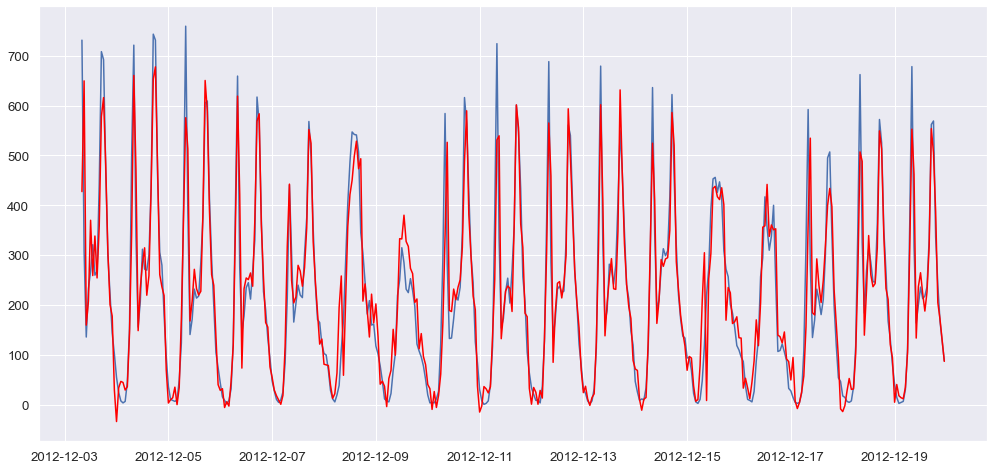

In [221]:
plt.figure(figsize=(17,8))
plt.plot(df_part.iloc[-400:])
plt.plot(results.fittedvalues.iloc[-400:], color='red');

In [223]:
df_part

,count
2012-12-03 08:00:00,731
2012-12-03 09:00:00,308
2012-12-03 10:00:00,136
2012-12-03 11:00:00,233
2012-12-03 12:00:00,268
...,...
2012-12-19 19:00:00,336
2012-12-19 20:00:00,241
2012-12-19 21:00:00,168
2012-12-19 22:00:00,129


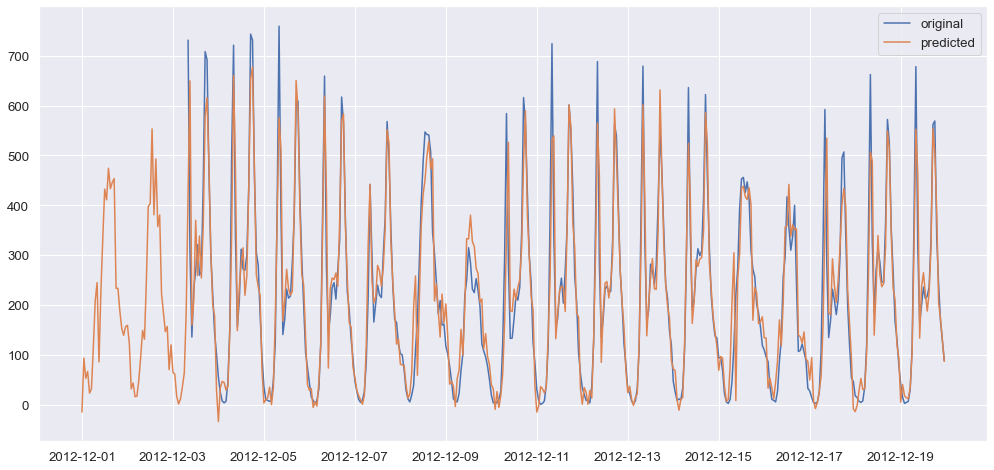

In [241]:
plt.figure(figsize=(17,8))
plt.plot(df_part,label='original')
plt.plot(results.predict(datetime(2012,12,1)),label='predicted')
plt.legend();

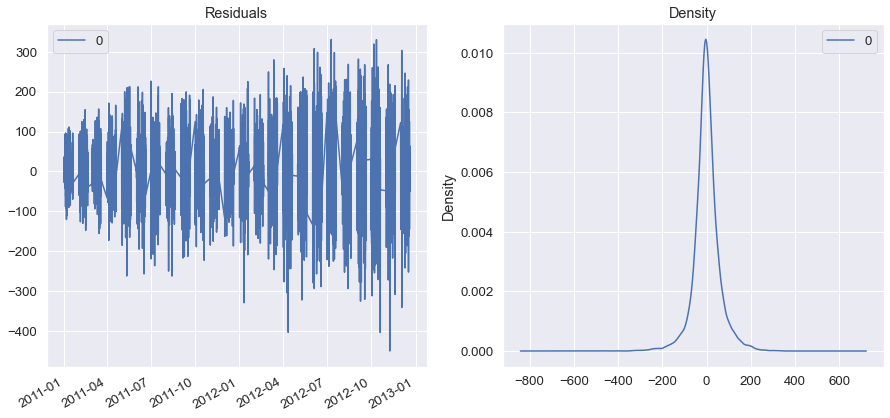

In [205]:
# Plot residual errors
residuals = pd.DataFrame(results.resid).iloc[:-400]
fig, ax = plt.subplots(1,2,figsize=(15,7))
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

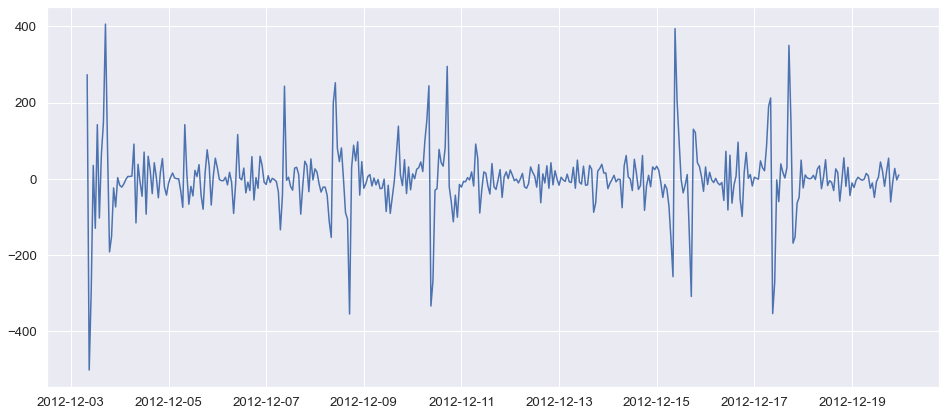

In [243]:
plt.figure(figsize=(16,7))
plt.plot(df.diff(24)[24:].diff(1)[-400:]);

In [208]:
from statsmodels.tsa.stattools import acf, pacf

# Create Training and Test
ratio = int(.85*400)
train = df.diff(9).diff(7*24).diff(24)[8*24+9:ratio]
test = df.diff(9).diff(7*24).diff(24)[ratio:]

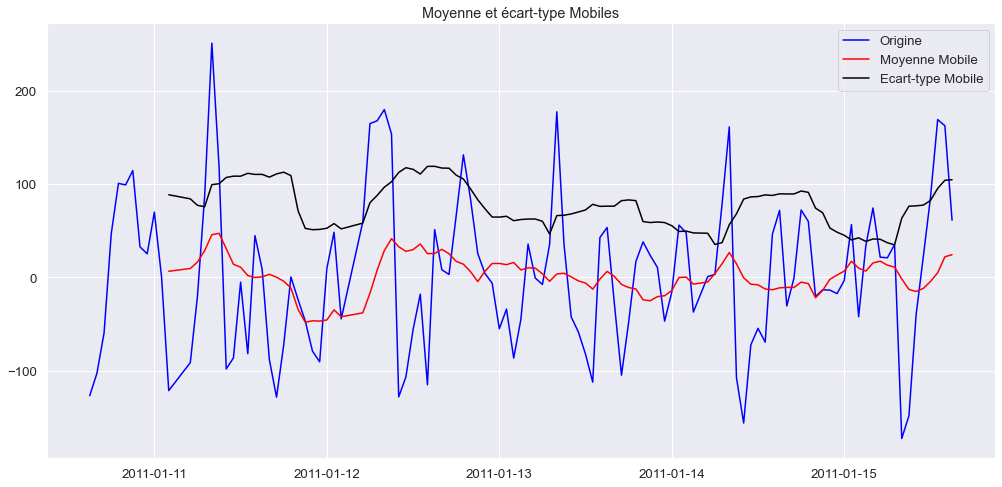

Statistiques ADF : -6.04840803083604
p-value : 1.295080076268879e-07
Valeurs Critiques :
	1%: -3.49181775886872
	5%: -2.8884437992971588
	10%: -2.5811201893779985


In [209]:
rolling_mean = train.rolling(window=24).mean()
df_minus_mean = train - rolling_mean
df_minus_mean.dropna(inplace=True)
get_stationarity(df_minus_mean)

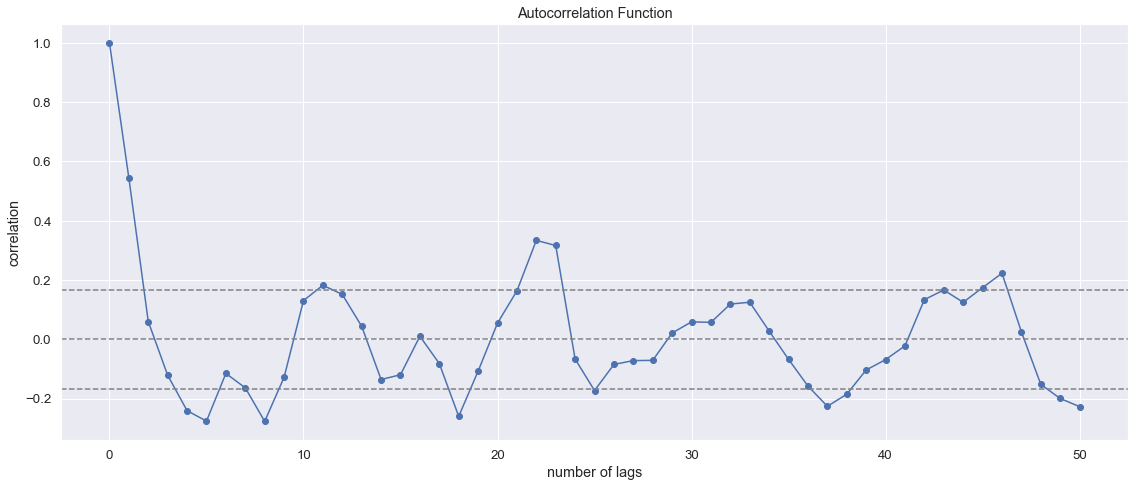

In [210]:
lag_acf = acf(train, nlags=50)
plt.figure(figsize=(16, 7))
#Plot ACF: 
plt.plot(lag_acf, marker="o")
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(train)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(train)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')
plt.xlabel('number of lags')
plt.ylabel('correlation')
plt.tight_layout()

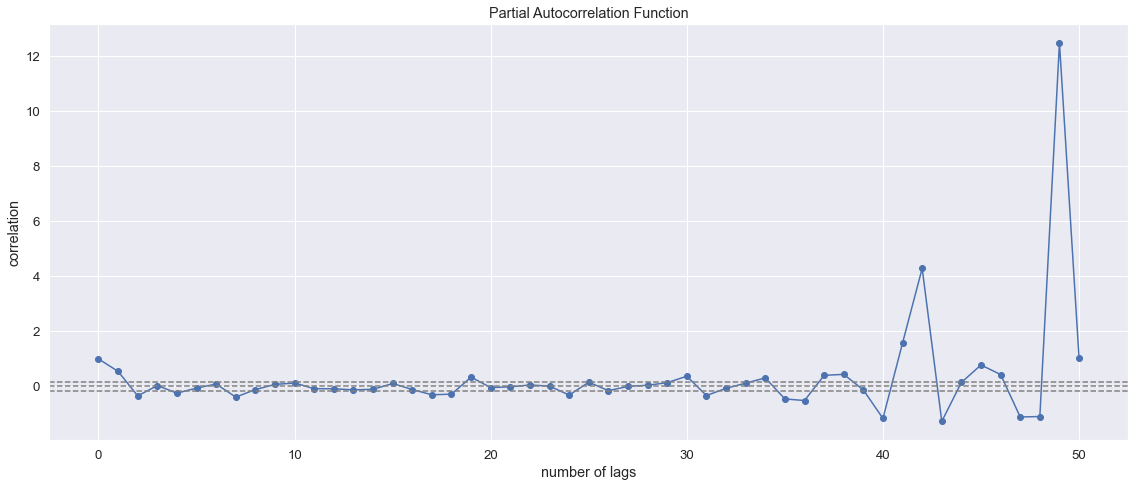

In [211]:
lag_acf = pacf(train, nlags=50)
plt.figure(figsize=(16, 7))
#Plot ACF: 
plt.plot(lag_acf, marker="o")
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(train)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(train)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.xlabel('number of lags')
plt.ylabel('correlation')
plt.tight_layout()

C:\Users\pauli\AppData\Local\Programs\Python\Python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:595: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\pauli\AppData\Local\Programs\Python\Python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:595: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\pauli\AppData\Local\Programs\Python\Python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:595: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\pauli\AppData\Local\Programs\Python\Python37\lib\site-packages\statsmodels\tsa\statespac

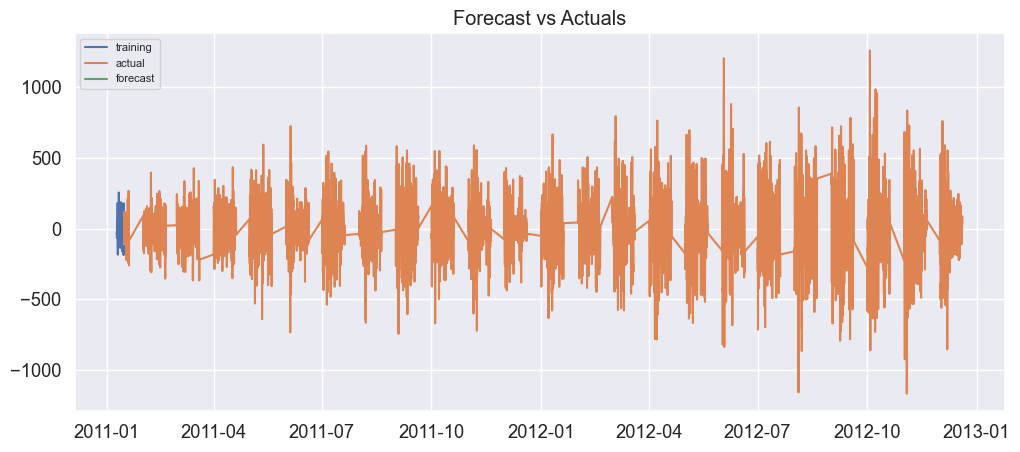

In [212]:
# Build Model
model = ARIMA(train, order=(24, 2, 24))  
fitted = model.fit()  

# Forecast
fc = fitted.forecast(len(test), alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
# lower_series = pd.Series(conf[:, 0], index=test.index)
# upper_series = pd.Series(conf[:, 1], index=test.index)
 
# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
# plt.fill_between(lower_series.index, lower_series, upper_series, 
#                  color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [213]:
# fitted.summary()

In [214]:
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    # acf1 = acf(fc-test)[1]                      # ACF1
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, #'acf1':acf1, 
            'corr':corr, 'minmax':minmax})

forecast_accuracy(fc.values, test.values.reshape(test.values.shape[0]))

C:\Users\pauli\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  
C:\Users\pauli\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in true_divide
  """


{'mape': inf,
 'me': 520.5859733158438,
 'mae': 529.0042468176986,
 'mpe': inf,
 'rmse': 628.212102292797,
 'corr': 0.00036455191712640885,
 'minmax': 1.086693595209242}

sarima

In [215]:
import pmdarima as pm

# Seasonal - fit stepwise auto-ARIMA
smodel = pm.auto_arima(train, start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, m=12,
                         start_P=0, seasonal=True,
                         d=None, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=1.34 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=1555.675, Time=0.04 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=1514.252, Time=0.81 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=2.12 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=1553.685, Time=0.04 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=1522.193, Time=0.19 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=1493.198, Time=3.18 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=5.55 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=1.32 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=1539.538, Time=2.35 sec
 ARIMA(2,0,0)(2,1,0)[12] intercept   : AIC=1484.683, Time=2.97 sec
 ARIMA(2,0,0)(1,1,0)[12] intercept   : AIC=1507.078, Time=1.29 sec
 ARIMA(2,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=7.23 sec
 ARIMA(2,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=1.77 sec
 ARIMA(3,0,0)(2,1,0)[12] intercept   : AIC=1486.0

In [216]:
smodel = pm.auto_arima(train, start_p=24, start_q=24,
                         test='adf',
                         max_p=25, max_q=25, m=12,
                         start_P=0, seasonal=True,
                         d=None, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(11,0,11)(0,1,1)[12] intercept   : AIC=inf, Time=18.74 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=1555.675, Time=0.04 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=1514.252, Time=0.71 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=1.31 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=1553.685, Time=0.04 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=1522.193, Time=0.23 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=1493.198, Time=2.92 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=4.34 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=1.06 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=1539.538, Time=1.61 sec
 ARIMA(2,0,0)(2,1,0)[12] intercept   : AIC=1484.683, Time=3.29 sec
 ARIMA(2,0,0)(1,1,0)[12] intercept   : AIC=1507.078, Time=0.90 sec
 ARIMA(2,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=6.11 sec
 ARIMA(2,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=2.10 sec
 ARIMA(3,0,0)(2,1,0)[12] intercept   : AIC=148

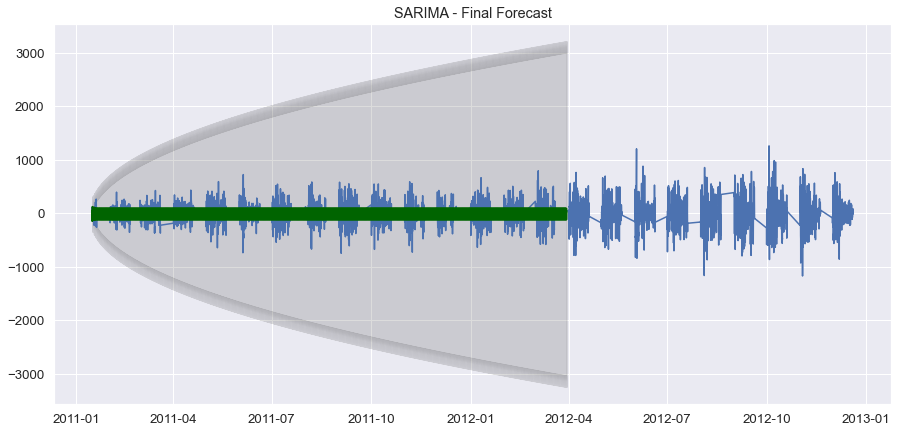

In [217]:
# Forecast
n_periods = len(test)
fitted, confint = smodel.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = pd.date_range(train.index[-1], periods = n_periods, freq='h')

# make series for plotting purpose
fitted_series = pd.Series(fitted, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.figure(figsize=(15,7))
plt.plot(test)
plt.plot(fitted_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("SARIMA - Final Forecast")
plt.show()

In [40]:
df = df.asfreq('h')

In [ ]:
df

C:\Users\pauli\AppData\Roaming\Python\Python37\site-packages\matplotlib\axes\_base.py:2141: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)


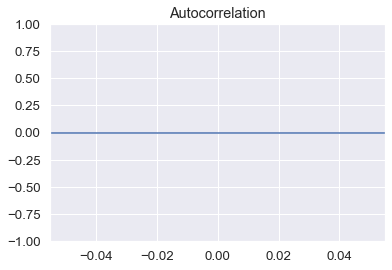

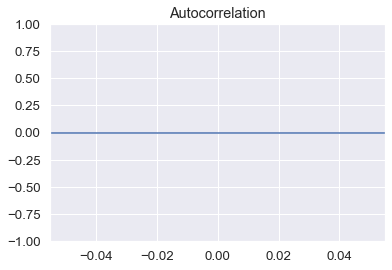

In [41]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 
plot_acf(df)

C:\Users\pauli\AppData\Local\Programs\Python\Python37\lib\site-packages\statsmodels\graphics\tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


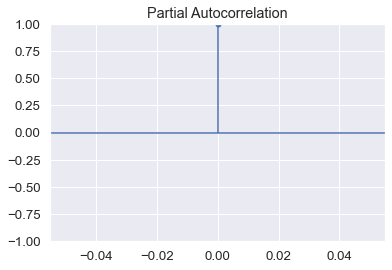

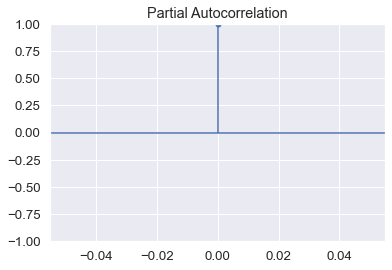

In [42]:
plot_pacf(df)

In [43]:
import statsmodels.api as sm
#from sm.tsa.statespace import SARIMAX

# define model configuration
my_order = (1, 1, 1)
my_seasonal_order = (2, 1, 2, 24)
# define model
model = sm.tsa.statespace.SARIMAX(df, order=my_order, seasonal_order=my_seasonal_order)
model_fit = model.fit()

In [ ]:
predictions = model_fit.forecast(24*7)

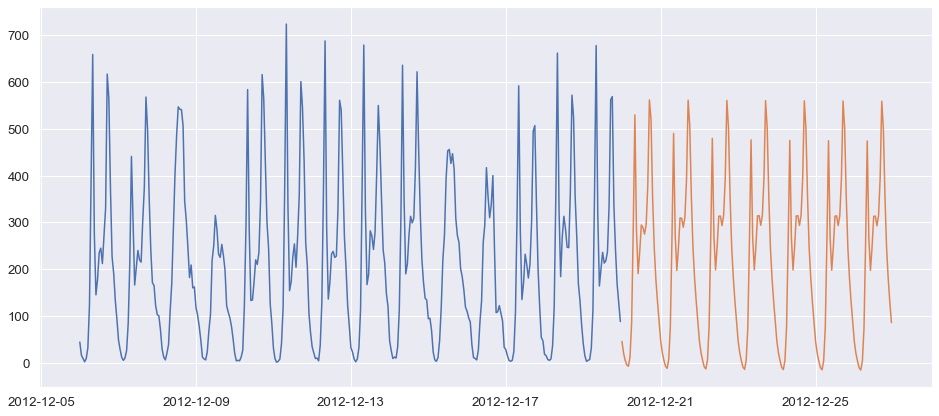

In [ ]:
plt.figure(figsize=(16,7))
plt.plot(df[-24*14:])
plt.plot(predictions);